In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [2]:
# random_dataset/mys_admbnda_adm2_unhcr_20210211.shp

In [3]:
malaysia_map = gpd.read_file('random_dataset/mys_admbnda_adm1_unhcr_20210211.shp')

<AxesSubplot:>

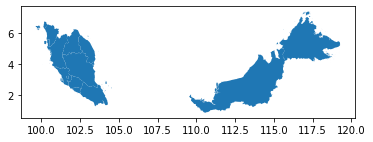

In [4]:
malaysia_map.plot()

In [5]:
malaysia_map.head()

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,10.541451,1.556311,Johor,MY01,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((103.42134 1.30583, 103.42113 1..."
1,8.615689,0.777377,Kedeh,MY02,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((100.32889 5.66444, 100.32917 5..."
2,7.185704,1.234524,Kelantan,MY03,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((102.17395 6.20126, 102.17395 6..."
3,2.067451,0.134483,Melaka,MY06,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((102.33500 2.04833, 102.33528 2..."
4,3.620969,0.542415,Negeri,MY07,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((101.79472 2.51389, 101.79444 2..."


In [6]:
df = pd.read_csv('covid19-public-main/vaccination/vax_school.csv')
crs = {'init': 'epsg:4326'}

In [7]:
df.head()

,code,school,state,district,postcode,lat,lon,dose1_staff,dose2_staff,dose1_student,...,dose1_16,dose1_17,dose1_18,dose2_12,dose2_13,dose2_14,dose2_15,dose2_16,dose2_17,dose2_18
0,ABA0001,SK TOH TANDEWA SAKTI,8,56,35000,4.196633,101.255932,100.0,100.0,72.2,...,NaN,NaN,NaN,2.6,0.0,0.0,NaN,NaN,NaN,NaN
1,ABA0002,SK PENDITA ZA'BA,8,56,35400,4.178276,101.200617,100.0,100.0,66.2,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,ABA0003,SK BANIR,8,56,35400,4.204361,101.181893,100.0,100.0,50.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,ABA0004,SK TEMOH,8,56,35350,4.235841,101.172819,100.0,100.0,77.8,...,NaN,NaN,NaN,5.6,NaN,NaN,NaN,NaN,NaN,NaN
4,ABA0005,SK CHENDERIANG,8,56,35300,4.267980,101.240556,100.0,100.0,81.1,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


1 - Johor, 2 - Kedah, 3 - Kelantan, 4 - Melaka, 5 - Negeri Sembilan, 6 - Pahang, 7 - Pulau Pinang, 8 - Perak, 9 - Perlis, 10 - Selangor, 11 - Terengganu, 12 - Sabah, 13 - Sarawak, 14 - W.P. Kuala Lumpur, 15 - W.P. Labuan, 16 - W.P. Putrajaya

In [8]:
#df[df['state'] == 17].head()

In [9]:
df['state'] = df['state'].replace([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], ['Johor', 'Kedah', 'Kelantan', 'Melaka', 'Negeri Sembilan', 'Pahang', 'Pulau Pinang', 'Perak', 'Perlis', 'Selangor', 'Terengganu', 'Sabah', 'Sarawak', 'W.P. Kuala Lumpur', 'W.P. Labuan', 'W.P. Putrajaya'])

In [10]:
df['state'].unique()

array(['Perak', 'Selangor', 'Pahang', 'Kelantan', 'Johor', 'Kedah',
       'Melaka', 'Negeri Sembilan', 'Pulau Pinang', 'Perlis',
       'Terengganu', 'W.P. Kuala Lumpur', 'W.P. Labuan', 'W.P. Putrajaya',
       'Sabah', 'Sarawak'], dtype=object)

In [11]:
df.isna().sum()

code                0
school              0
state               0
district            0
postcode            0
lat                 0
lon                 0
dose1_staff         0
dose2_staff         0
dose1_student      43
dose2_student      43
dose1_12         1691
dose1_13         6665
dose1_14         7241
dose1_15         7665
dose1_16         7803
dose1_17         7799
dose1_18         8361
dose2_12         1691
dose2_13         6665
dose2_14         7241
dose2_15         7665
dose2_16         7803
dose2_17         7799
dose2_18         8361
dtype: int64

We can see that 43 schools listed there does not have any information regarding doses taken by student. Since it's only 0.43% of the row is incomplete, we have decided to drop the data with null value on students.

We did not drop rows that has null values on the other column such as dose1_12 and dose2_12, as not all school do have students at that age enrolls there. (Namely SK only has students around age 7-12)

In [28]:
df.dropna(subset = ["dose1_student"], inplace=True)

In [13]:
df.isna().sum()

code                0
school              0
state               0
district            0
postcode            0
lat                 0
lon                 0
dose1_staff         0
dose2_staff         0
dose1_student       0
dose2_student       0
dose1_12         1648
dose1_13         6622
dose1_14         7198
dose1_15         7622
dose1_16         7760
dose1_17         7756
dose1_18         8318
dose2_12         1648
dose2_13         6622
dose2_14         7198
dose2_15         7622
dose2_16         7760
dose2_17         7756
dose2_18         8318
dtype: int64

In [14]:
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
geometry[:3]

In [15]:
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
geo_df.head()

C:\Users\user\anaconda3\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,code,school,state,district,postcode,lat,lon,dose1_staff,dose2_staff,dose1_student,...,dose1_17,dose1_18,dose2_12,dose2_13,dose2_14,dose2_15,dose2_16,dose2_17,dose2_18,geometry
0,ABA0001,SK TOH TANDEWA SAKTI,Perak,56,35000,4.196633,101.255932,100.0,100.0,72.2,...,NaN,NaN,2.6,0.0,0.0,NaN,NaN,NaN,NaN,POINT (101.25593 4.19663)
1,ABA0002,SK PENDITA ZA'BA,Perak,56,35400,4.178276,101.200617,100.0,100.0,66.2,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,POINT (101.20062 4.17828)
2,ABA0003,SK BANIR,Perak,56,35400,4.204361,101.181893,100.0,100.0,50.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,POINT (101.18189 4.20436)
3,ABA0004,SK TEMOH,Perak,56,35350,4.235841,101.172819,100.0,100.0,77.8,...,NaN,NaN,5.6,NaN,NaN,NaN,NaN,NaN,NaN,POINT (101.17282 4.23584)
4,ABA0005,SK CHENDERIANG,Perak,56,35300,4.267980,101.240556,100.0,100.0,81.1,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,POINT (101.24056 4.26798)


<AxesSubplot:>

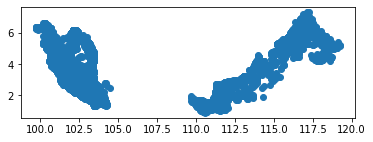

In [16]:
#geo_df['geometry'].aspe
geo_df['geometry'].plot(aspect=1)

In [26]:
malaysia_map

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,10.541451,1.556311,Johor,MY01,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((103.42134 1.30583, 103.42113 1..."
1,8.615689,0.777377,Kedeh,MY02,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((100.32889 5.66444, 100.32917 5..."
2,7.185704,1.234524,Kelantan,MY03,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((102.17395 6.20126, 102.17395 6..."
3,2.067451,0.134483,Melaka,MY06,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((102.33500 2.04833, 102.33528 2..."
4,3.620969,0.542415,Negeri,MY07,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((101.79472 2.51389, 101.79444 2..."
5,10.750731,2.919169,Pahang,MY08,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((103.45879 3.46532, 103.45823 3..."
6,11.358448,1.707114,Perak,MY09,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((100.10291 3.97632, 100.10300 3..."
7,1.361590,0.067320,Perlis,MY10,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"POLYGON ((100.12444 6.40509, 100.12567 6.40631..."
8,2.616795,0.086223,Pulau Pinang,MY11,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((100.17973 5.23083, 100.18000 5..."
9,38.328468,6.028039,Sabah,MY12,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((118.62939 4.11226, 118.62906 4..."


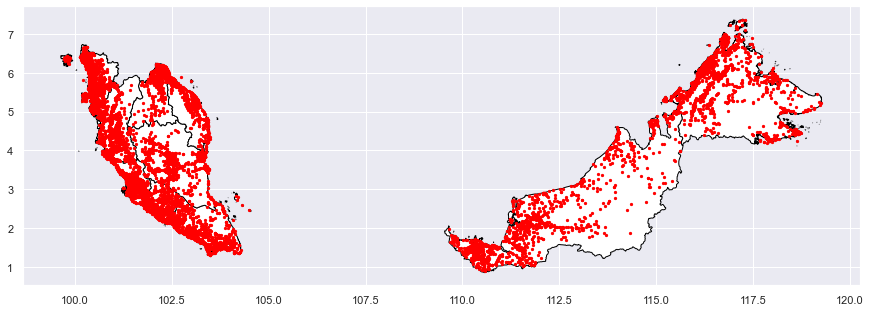

In [25]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_aspect('equal')

malaysia_map.plot(ax=ax, color='white', edgecolor='black')
geo_df.plot(ax=ax, marker='o', color='red', markersize=5)

plt.show()

The map above shows the distribution of schools in Malaysia (shown as red dots).

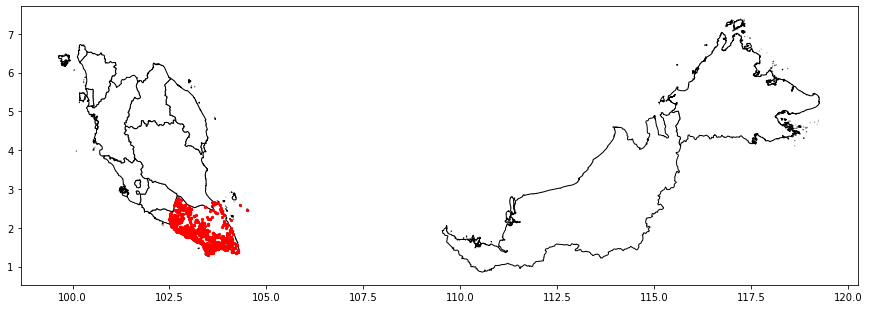

In [17]:
# fig, ax = plt.subplots(figsize=(15,15))
# malaysia_map.plot(ax=ax, alpha=0.4, color='gray')
# geo_df.plot(ax=ax, markersize=20, color='blue', marker='o', label='School')
# plt.legend(prop={'size': 15})
fig, ax = plt.subplots(figsize=(15,15))
ax.set_aspect('equal')

malaysia_map.plot(ax=ax, color='white', edgecolor='black')
geo_df[geo_df['state'] == 'Johor'].plot(ax=ax, marker='o', color='red', markersize=5)

plt.show()

### Mean vaccination rate in schools amongst students and staffs

To evaluate how safe it is if the school reopens, we considered looking at the vaccination rate at each schools for staffs and students. We would look at the mean percentage by states, as schools would reopen by states.

In [18]:
# https://stackoverflow.com/questions/32908315/could-not-interpret-input-error-with-seaborn-when-plotting-groupbys/32908624
df_trim = df.groupby('state', as_index=False).mean()

In [19]:
df_trim

,state,district,postcode,lat,lon,dose1_staff,dose2_staff,dose1_student,dose2_student,dose1_12,...,dose1_16,dose1_17,dose1_18,dose2_12,dose2_13,dose2_14,dose2_15,dose2_16,dose2_17,dose2_18
0,Johor,4.663567,83273.090448,1.871637,103.306228,98.867540,98.078867,78.356551,22.347844,74.773214,...,97.147518,98.062500,98.105932,14.857639,23.760780,26.273585,28.762687,70.603546,72.795714,89.507203
1,Kedah,15.278667,7806.230667,5.863783,100.491550,98.709333,97.762267,77.997867,21.771067,74.335818,...,96.989552,97.401493,96.705096,12.697407,37.920833,40.332946,50.188832,81.242786,84.149254,93.309554
2,Kelantan,28.251678,16905.781879,5.846821,102.194673,98.586242,97.701007,75.535906,24.929195,70.029638,...,95.454857,96.740909,96.909483,13.725586,38.035906,31.280870,54.571121,78.273714,82.028409,90.516379
3,Melaka,35.114650,76541.592357,2.287706,102.274664,99.132803,98.720382,79.051274,20.233121,74.167433,...,97.653947,98.346053,97.993548,8.405364,43.005405,33.496000,64.137143,80.450000,78.132895,93.890323
4,Negeri Sembilan,40.463158,71729.250526,2.703546,102.115100,98.939579,98.482316,65.597895,15.636842,57.311488,...,97.050806,97.633871,96.710638,6.047781,31.591121,17.025000,47.963889,66.537097,69.537903,87.959574
5,Pahang,49.282225,27866.971506,3.664863,102.575915,98.954817,98.191723,75.503392,19.665265,69.759145,...,96.482323,97.492386,98.625197,4.384444,45.158360,42.189024,59.803361,89.855051,89.528934,94.607874
6,Perak,60.772187,33531.134492,4.539639,100.949010,98.580055,97.713083,75.447210,15.102287,71.189508,...,96.607661,97.681452,96.867805,6.528415,14.214681,14.711884,18.589474,83.192742,86.083065,89.850244
7,Perlis,67.000000,1975.480769,6.452178,100.224524,98.415385,97.372115,79.200962,21.084615,74.119048,...,97.176667,98.173333,96.652174,6.682143,43.823529,52.303333,54.103333,89.236667,86.136667,92.947826
8,Pulau Pinang,70.386935,12640.175879,5.379311,100.380213,98.924623,98.041206,79.964824,16.115829,75.726710,...,96.192000,96.288189,97.670330,2.889577,13.348684,14.617557,16.477500,82.311200,86.288189,91.773626
9,Sabah,85.858249,89723.615802,5.648841,116.825116,97.924710,96.492099,82.372967,61.246708,80.824912,...,92.822374,93.944545,94.460819,58.804313,68.125385,74.803070,74.850698,81.076712,83.813636,88.933333


#### Students

<AxesSubplot:xlabel='dose1_student', ylabel='state'>

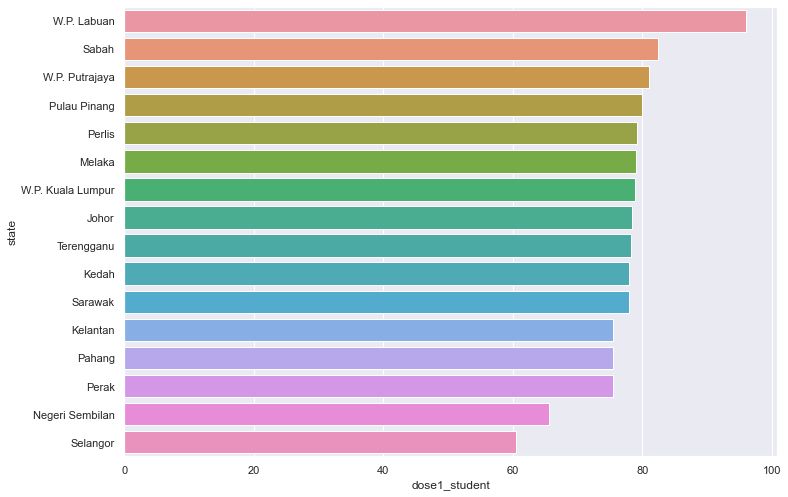

In [20]:
df_trim = df_trim.sort_values('dose1_student', ascending=False)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data=df_trim, x='dose1_student', y='state', orient='h')
#sns.factorplot(x='state', y='dose1_student', data=df)

<AxesSubplot:xlabel='dose2_student', ylabel='state'>

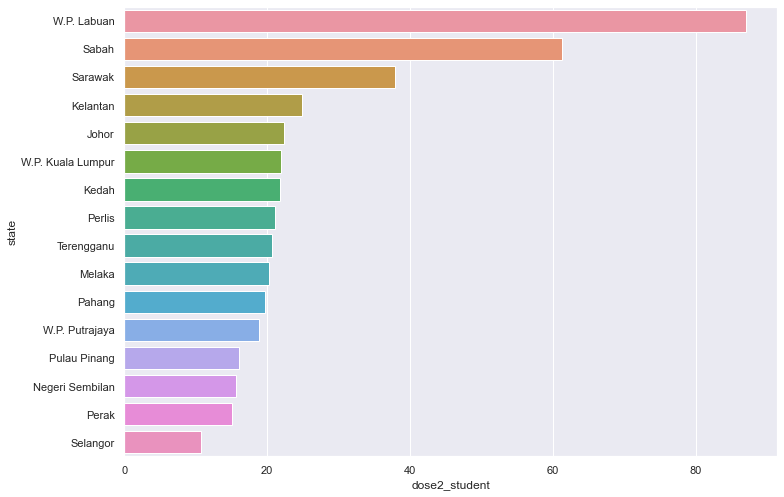

In [21]:
df_trim = df_trim.sort_values('dose2_student', ascending=False)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data=df_trim, x='dose2_student', y='state', orient='h')

We can see that most of the students (>80%) have at least taken their first dose for all states. However, only W.P. Labuan have a high rate of full vaccinations for students (>80%), with more than half of the states having only 20% of their students fully vaccinated.

#### Staffs

<AxesSubplot:xlabel='dose1_staff', ylabel='state'>

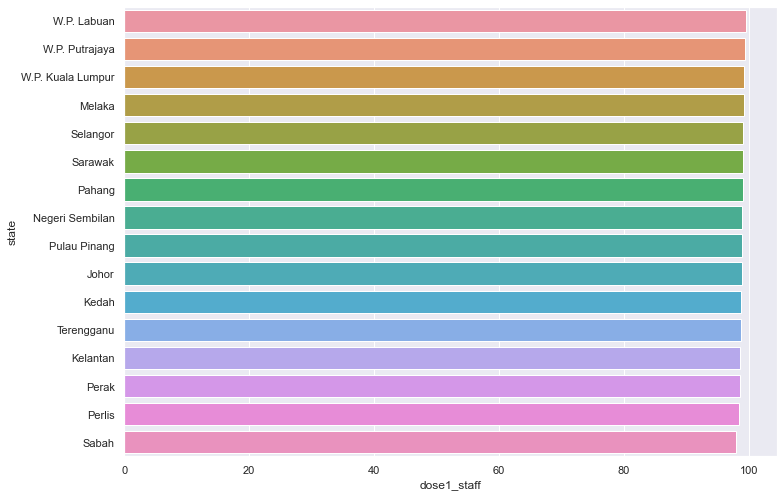

In [23]:
df_trim = df_trim.sort_values('dose1_staff', ascending=False)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data=df_trim, x='dose1_staff', y='state', orient='h')

<AxesSubplot:xlabel='dose2_staff', ylabel='state'>

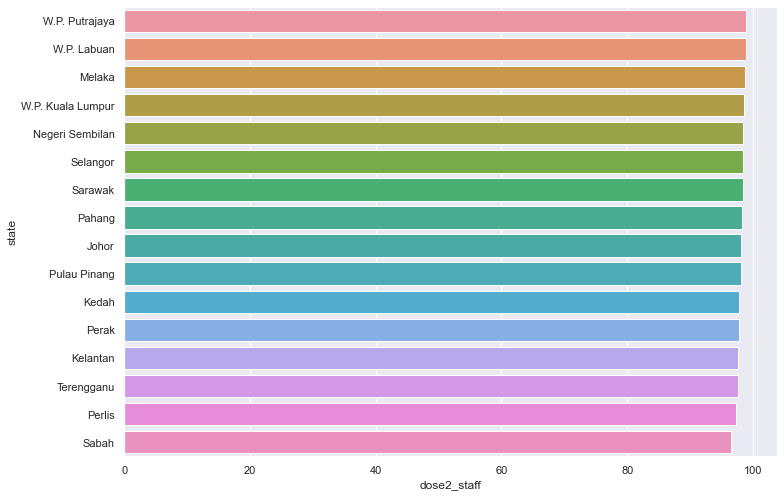

In [24]:
df_trim = df_trim.sort_values('dose2_staff', ascending=False)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data=df_trim, x='dose2_staff', y='state', orient='h')

We can see that most of the staffs (>90%) have completed their vaccination. 